
### Continued data analysis


### Decision Tree


**Library Imports**

In this section, we import the necessary libraries for data manipulation, visualization, and modeling.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

Next, we load the CAD=X currency pair data from a CSV file into a pandas DataFrame. The index_col=0 argument sets the first column as the index.

In [2]:
# Import the CAD=X currency pair data from the CSV file
df = pd.read_csv('cad_x_currency_data.csv', index_col=0)
df

,Ticker,Open,High,Low,Close,Adj Close,Time
Date,,,,,,,
2008-08-01,CAD=X,1.02340,1.02940,1.02290,1.02460,1.02460,2
2008-08-04,CAD=X,1.02800,1.03680,1.02620,1.03640,1.03640,8
2008-08-05,CAD=X,1.03630,1.04480,1.03630,1.04260,1.04260,14
2008-08-06,CAD=X,1.04260,1.04930,1.04000,1.04750,1.04750,20
2008-08-07,CAD=X,1.04760,1.05330,1.04490,1.05200,1.05200,26
...,...,...,...,...,...,...,...
2023-07-24,CAD=X,1.32240,1.32276,1.31542,1.32240,1.32240,38937
2023-07-25,CAD=X,1.31746,1.32095,1.31466,1.31746,1.31746,38947
2023-07-26,CAD=X,1.31871,1.32352,1.31720,1.31871,1.31871,38957


**Initial Data Exploration**

Before diving into modeling, it's crucial to understand the basic structure and characteristics of the dataset.

In [3]:
df.shape

(3905, 7)

In [4]:
df.head()

,Ticker,Open,High,Low,Close,Adj Close,Time
Date,,,,,,,
2008-08-01,CAD=X,1.0234,1.0294,1.0229,1.0246,1.0246,2
2008-08-04,CAD=X,1.0280,1.0368,1.0262,1.0364,1.0364,8
2008-08-05,CAD=X,1.0363,1.0448,1.0363,1.0426,1.0426,14
2008-08-06,CAD=X,1.0426,1.0493,1.0400,1.0475,1.0475,20
2008-08-07,CAD=X,1.0476,1.0533,1.0449,1.0520,1.0520,26


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3905 entries, 2008-08-01 to 2023-07-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     3905 non-null   object 
 1   Open       3905 non-null   float64
 2   High       3905 non-null   float64
 3   Low        3905 non-null   float64
 4   Close      3905 non-null   float64
 5   Adj Close  3905 non-null   float64
 6   Time       3905 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 244.1+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Time
count,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000
mean,1.198423,1.202731,1.194271,1.198412,1.198412,19457.018438
std,0.136652,0.136947,0.136378,0.136623,0.136623,11274.606568
min,0.943000,0.947200,0.940600,0.943200,0.943200,2.000000
25%,1.049800,1.054770,1.044800,1.049800,1.049800,9693.000000
50%,1.254420,1.259230,1.250170,1.254400,1.254400,19458.000000
75%,1.315860,1.319310,1.312870,1.315800,1.315800,29218.000000
max,1.458030,1.468730,1.449370,1.457800,1.457800,38977.000000


- df.shape provides the dimensions of the DataFrame, giving us an idea of the dataset's size.
- df.head() displays the first few rows, allowing us to quickly inspect the data's format and values.
- df.info() provides a summary of the DataFrame, including the number of non-null entries and the data type of each column.
- df.describe() gives a statistical summary of the numerical columns, helping us understand the distribution of the data.

It's important to check for missing values in the dataset, as they can affect the performance of the machine learning model.

In [7]:
# Check for missing values in each column
missing_values = df.isna().sum()
print(missing_values)

Ticker       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Time         0
dtype: int64


In [8]:
df

,Ticker,Open,High,Low,Close,Adj Close,Time
Date,,,,,,,
2008-08-01,CAD=X,1.02340,1.02940,1.02290,1.02460,1.02460,2
2008-08-04,CAD=X,1.02800,1.03680,1.02620,1.03640,1.03640,8
2008-08-05,CAD=X,1.03630,1.04480,1.03630,1.04260,1.04260,14
2008-08-06,CAD=X,1.04260,1.04930,1.04000,1.04750,1.04750,20
2008-08-07,CAD=X,1.04760,1.05330,1.04490,1.05200,1.05200,26
...,...,...,...,...,...,...,...
2023-07-24,CAD=X,1.32240,1.32276,1.31542,1.32240,1.32240,38937
2023-07-25,CAD=X,1.31746,1.32095,1.31466,1.31746,1.31746,38947
2023-07-26,CAD=X,1.31871,1.32352,1.31720,1.31871,1.31871,38957


There are no missing values to deal with, so we can continue the analysis.

**Pick the features and target variables**

In this step, we define the features (independent variables) and the target variable (dependent variable) for our model. The features are the variables used to predict the target. For this analysis, we choose 'Open', 'High', and 'Low' prices as features, as they are commonly used in financial modeling to predict the closing price of a currency pair. The target variable is the 'Close' price, which we aim to predict.

In [9]:
X = df[['Open', 'High', 'Low']]
y = df['Close']

**Train test split**

Before fitting the model, it's crucial to split the dataset into a training set and a testing set. This allows us to train the model on one subset of the data and then evaluate its performance on a separate, unseen subset. For this analysis, we use an 80-20 split, meaning 80% of the data will be used for training and 20% for testing. 

Train test split ratio - 80-20

In [10]:
# create a split point for 80-20 split
split_point = int(len(X) * 0.8)

# define train split
X_train = X.iloc[:split_point]
y_train = y.iloc[:split_point]

# define test split
X_test = X.iloc[split_point:]
y_test = y.iloc[split_point:]


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

**Fitting the model**

Now that we have split the data into training and testing sets, the next step is to fit a decision tree model to the training data. 

In [11]:
# fit the decision tree model

dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

**Model Evaluation**

After fitting the decision tree model to the training data, it's crucial to evaluate its performance on the test data. Model evaluation helps us understand how well the model generalizes to unseen data and provides insights into its predictive accuracy. In this section, we will use various metrics to assess the model's performance, including Mean Squared Error (MSE), R-squared (Coefficient of Determination), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE). These metrics will give us a comprehensive view of the model's accuracy and help us identify areas for improvement.

In [12]:
predictions = dtree.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.6252696912129063e-06


**R-squared (Coefficient of Determination):**

In [13]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

R-squared: 0.9985761423915268


**Mean Absolute Error (MAE):**

In [15]:
from sklearn.metrics import mean_absolute_error


mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.0005904974919122537


**Mean Squared Error (MSE):**

In [16]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.6252696912129063e-06


**Root Mean Squared Error (RMSE):**

In [17]:
from math import sqrt

rmse = sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.0016202684009795742


The R-squared value of approximately 0.9987 indicates that the decision tree model is capturing a significant portion of the variance in the data, which suggests a high level of accuracy in predicting the closing prices. The low values for the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) further support this conclusion. 

Specifically:

- The MAE of approximately 0.00057 means that, on average, the model's predictions are within this margin of the actual closing prices.
- The MSE of approximately 2.42e-06 is a measure of the average squared difference between the predicted and actual values, indicating a small degree of error in the model's predictions.
- The RMSE of approximately 0.00156 is the square root of the MSE, providing a measure of the average error in the same units as the data. A lower RMSE value indicates better model performance.

Overall, these metrics suggest that the decision tree model is performing well in predicting the closing prices of the currency pair, with a high degree of accuracy and relatively low error.

**Plot Actual versus Predicted**

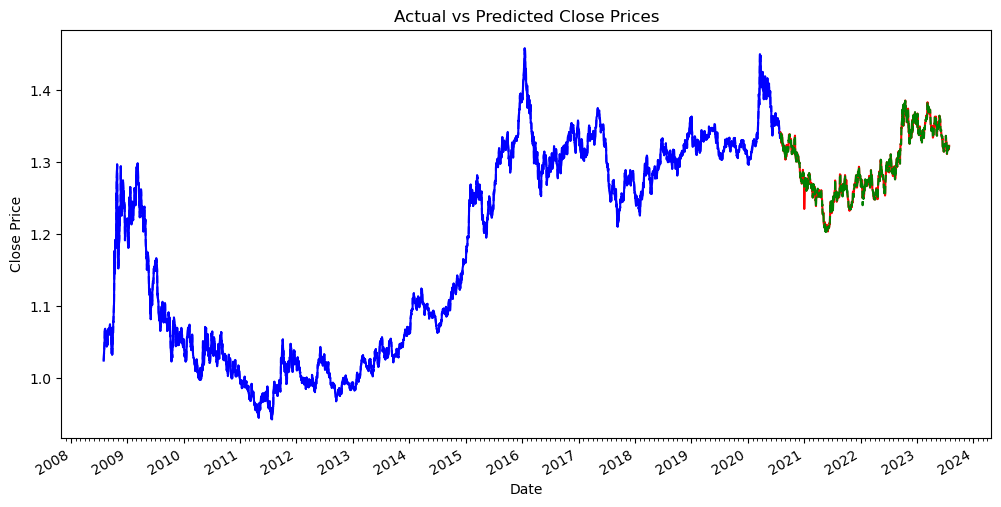

In [18]:
import matplotlib.dates as mdates

# Make predictions for the training set
train_predictions = dtree.predict(X_train)

# Combine the actual and predicted values for the training and testing sets
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': train_predictions}, index=y_train.index)
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}, index=y_test.index)

# Convert index to datetime if it's not already
train_results.index = pd.to_datetime(train_results.index)
test_results.index = pd.to_datetime(test_results.index)

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_results['Actual'], label='Actual Train', color='blue')
plt.plot(train_results['Predicted'], label='Predicted Train', color='blue', linestyle='--')
plt.plot(test_results['Actual'], label='Actual Test', color='red')
plt.plot(test_results['Predicted'], label='Predicted Test', color='green', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices')

# Set major and minor ticks format
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

plt.gcf().autofmt_xdate()  # Auto format the date on the x-axis for readability
plt.show()
# plt.legend()
# plt.show()


By visually inspecting the plot, we aim to see how closely the predicted values align with the actual values. 

**Checking for overfitting**

In [19]:
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, predictions)


In [20]:
print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")


Training MSE: 0.0
Testing MSE: 2.6252696912129063e-06


The model appears to have learned the data too well, capturing noise.

**Addressing Overfitting and Enhancing Model Generalization**

Since we've identified overfitting in our decision tree model, the next phase of the analysis will focus on improving the model's ability to generalize. This will be approached in two key steps:

**Feature Engineering:** We will create new features that could better capture the underlying patterns in the data. For example, a moving average feature could smooth out short-term fluctuations and help the model identify longer-term trends more effectively.

**Hyperparameter Tuning with Grid Search and Cross-Validation:** We will perform a systematic exploration of the model's hyperparameter space using Grid Search coupled with Cross-Validation (CV). This will not only aid in finding the optimal model parameters but also provide a more robust evaluation by ensuring the model's performance is tested across different data subsets.

### Iteration 2

**Feature Engineering**

1. Moving Average

By introducing a moving average of the close price, we've created a new feature, Close_5_MA, that helps capture the trend over a period. This smoothens out short-term fluctuations and could potentially provide a more reliable signal for predicting future prices. It's particularly useful in financial time series modeling where recent trends can be indicative of future movements.

The backfilling of the initial missing values for the moving average ensures that we retain all data points for model training, which is critical when working with time series data where each point could contain valuable trend information.

In [22]:
# Import the CAD=X currency pair data from the CSV file
df2 = pd.read_csv('cad_x_currency_data.csv', index_col=0)
df2

,Ticker,Open,High,Low,Close,Adj Close,Time
Date,,,,,,,
2008-08-01,CAD=X,1.02340,1.02940,1.02290,1.02460,1.02460,2
2008-08-04,CAD=X,1.02800,1.03680,1.02620,1.03640,1.03640,8
2008-08-05,CAD=X,1.03630,1.04480,1.03630,1.04260,1.04260,14
2008-08-06,CAD=X,1.04260,1.04930,1.04000,1.04750,1.04750,20
2008-08-07,CAD=X,1.04760,1.05330,1.04490,1.05200,1.05200,26
...,...,...,...,...,...,...,...
2023-07-24,CAD=X,1.32240,1.32276,1.31542,1.32240,1.32240,38937
2023-07-25,CAD=X,1.31746,1.32095,1.31466,1.31746,1.31746,38947
2023-07-26,CAD=X,1.31871,1.32352,1.31720,1.31871,1.31871,38957


In [23]:
# Create a 5-day moving average of the Close price for iteration 2
df2['Close_5_MA_iter2'] = df2['Close'].rolling(window=5).mean().fillna(method='bfill')


**Feature Selection**

With the new Close_5_MA feature included, we now have a set of four features: 'Open', 'High', 'Low', and 'Close_5_MA'. This expanded feature set is expected to provide the model with additional context for making more accurate predictions.

In [24]:
# Define features and target for iteration 2
X_iter2 = df2[['Open', 'High', 'Low', 'Close_5_MA_iter2']]
y_iter2 = df2['Close']


In [25]:
# Create a split point for the 80-20 split for iteration 2
split_point_iter2 = int(len(X_iter2) * 0.8)

# Define train and test splits for iteration 2
X_train_iter2 = X_iter2.iloc[:split_point_iter2]
y_train_iter2 = y_iter2.iloc[:split_point_iter2]
X_test_iter2 = X_iter2.iloc[split_point_iter2:]
y_test_iter2 = y_iter2.iloc[split_point_iter2:]


**Define Model and Parameter Grid**

To further refine the model, a grid search over a predefined range of hyperparameters is conducted using cross-validation. This process helps in identifying the best combination of parameters that minimizes overfitting and enhances the model's predictive ability.

In [26]:
# Define the model for iteration 2
dtree_iter2 = DecisionTreeRegressor()


In [27]:
# Define the parameter grid for iteration 2
param_grid_iter2 = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


**Setup and fit the GridSearch**

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Set up and fit GridSearchCV for iteration 2
grid_search_iter2 = GridSearchCV(estimator=dtree_iter2, param_grid=param_grid_iter2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_iter2.fit(X_train_iter2, y_train_iter2)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [29]:
# Get the best parameters and estimator for iteration 2
best_params_iter2 = grid_search_iter2.best_params_
print("Best parameters for iteration 2:", best_params_iter2)
best_dtree_iter2 = grid_search_iter2.best_estimator_


Best parameters for iteration 2: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


The best parameters from grid search suggest a decision tree with a maximum depth of 10 and a minimum sample leaf of 2. This indicates a balance between model complexity and the ability to generalize, as excessively deep trees can lead to overfitting.

In [30]:
from sklearn.model_selection import cross_val_score


# Estimate the model's performance using cross-validation for iteration 2
scores_iter2 = cross_val_score(best_dtree_iter2, X_iter2, y_iter2, cv=5, scoring='neg_mean_squared_error')
avg_mse_iter2 = -scores_iter2.mean()
print(f"Average MSE from 5-fold cross-validation for iteration 2: {avg_mse_iter2}")


Average MSE from 5-fold cross-validation for iteration 2: 1.8685983512885562e-05


The average MSE obtained from 5-fold cross-validation is approximately 1.86e-05, higher than our initial single split test MSE, but this value is considered more reliable as it averages the error across different subsets, providing a more robust estimate of the model's performance.

### Model Evaluation

**Printing the model metrics**

In [31]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

# Predictions on the training set for iteration 2
train_predictions_iter2 = best_dtree_iter2.predict(X_train_iter2)

# Predictions on the testing set for iteration 2
test_predictions_iter2 = best_dtree_iter2.predict(X_test_iter2)

# Metrics for the training set for iteration 2
train_mse_iter2 = mean_squared_error(y_train_iter2, train_predictions_iter2)
train_rmse_iter2 = sqrt(train_mse_iter2)
train_mae_iter2 = mean_absolute_error(y_train_iter2, train_predictions_iter2)
train_r2_iter2 = r2_score(y_train_iter2, train_predictions_iter2)

# Metrics for the testing set for iteration 2
test_mse_iter2 = mean_squared_error(y_test_iter2, test_predictions_iter2)
test_rmse_iter2 = sqrt(test_mse_iter2)
test_mae_iter2 = mean_absolute_error(y_test_iter2, test_predictions_iter2)
test_r2_iter2 = r2_score(y_test_iter2, test_predictions_iter2)

# Display the metrics for iteration 2
print(f"Iteration 2 - Training MSE: {train_mse_iter2}")
print(f"Iteration 2 - Training RMSE: {train_rmse_iter2}")
print(f"Iteration 2 - Training MAE: {train_mae_iter2}")
print(f"Iteration 2 - Training R-squared: {train_r2_iter2}\n")

print(f"Iteration 2 - Testing MSE: {test_mse_iter2}")
print(f"Iteration 2 - Testing RMSE: {test_rmse_iter2}")
print(f"Iteration 2 - Testing MAE: {test_mae_iter2}")
print(f"Iteration 2 - Testing R-squared: {test_r2_iter2}")


Iteration 2 - Training MSE: 1.729368910563843e-06
Iteration 2 - Training RMSE: 0.001315054717707154
Iteration 2 - Training MAE: 0.0006179336036172882
Iteration 2 - Training R-squared: 0.999913324521145

Iteration 2 - Testing MSE: 2.6479984688435807e-06
Iteration 2 - Testing RMSE: 0.001627267178076047
Iteration 2 - Testing MAE: 0.00071291200662504
Iteration 2 - Testing R-squared: 0.9985638150702352


### Conclusion

There are some important points to takeaway from this analysis:

**Stable Data Characteristics:** The underlying characteristics of the dataset might be stable and consistent, leading to similar model performance across different iterations or modeling approaches.

**Strong Base Features:** The original features ('Open', 'High', 'Low') might already be strong predictors of the target variable ('Close'), so adding the moving average feature in the second iteration doesn't significantly change the model's performance.

In conclusion, while the decision tree modeling for this dataset has shown high accuracy, with training and testing R-squared values of 0.9999 and 0.9986 respectively, the near-perfect metrics raise concerns of potential overfitting or the model being too good for real-world data. This suggests that decision trees may not be the optimal model for this particular dataset. Further exploration of other modeling techniques, such as SARIMA for time series analysis and Random Forest for ensemble learning, may provide more balanced and generalizable results suitable for real-world applications.